In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
import seaborn as sns
import math
import os

In [167]:
COLOR_HEIDENELKE = '#9C004B'
COLOR_GLUTROT = '#DA3C43'
COLOR_BLUE= '#5CABFF'
COLOR_DARKBLUE = '#18206F'

In [36]:
PATH = "../../data/finals_all_0106"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [37]:
file_data = []
diff_means = []
diff_program_means_dict = {'none': [], 'windup': [], 'getpixel': [], 'bitblt': [], 'getdbits': []}
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    try:
        mean = data_in.query("fw != -1")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
            diff_program_means_dict[data_in['program'][1]].append(mean)
    except:
        #print(data_in, file)
        pass
    file_data.append(data_in)
    
data = pd.concat(file_data)

In [38]:
data['ete_upper'] = data['ete_upper'] / 1000
data['ete_lower'] = data['ete_lower'] / 1000
data['fw'] = data['fw'] / 1000
data['diff'] = data['diff'] / 1000
data

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.291,13.603,4.887,6.404
1,1,1,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,12.327,14.641,6.417,5.910
2,2,2,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.633,13.950,5.467,6.166
3,3,3,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,12.471,14.785,6.739,5.732
4,4,4,2313,Blend2D,default,Blend2D_default,fullscreen,2.0,bitblt,11.277,13.592,5.210,6.067
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,43.989,0.338,40.566,3.423
196,196,196,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,41.916,0.509,38.535,3.381
197,197,197,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,43.320,0.346,39.826,3.494
198,198,198,3874,wxpython,rects,wxpython_rects,fullscreen,2.0,windup,44.345,0.689,40.669,3.676


In [39]:
data_small = data[data['fullscreen'] == 'small']
data_large = data[data['fullscreen'] == 'large']
data = pd.concat([data_small, data_large])

In [40]:
sns.set_theme(style="whitegrid", context="paper", font_scale=1.3, rc={'figure.figsize':(5, 15), "xtick.bottom": True, "grid.linestyle": ":"})

In [73]:
# fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 20))
# fig.suptitle("application sizes (getpixel)")

# plot = sns.violinplot(ax=axs[0], data=data[data['program'] == 'getpixel'], x='ete_upper', y='framework', hue='fullscreen', split=True, fill=False, inner='quart')
# plot = sns.violinplot(ax=axs[1], data=data[data['program'] == 'getpixel'], x='fw', y='framework', hue='fullscreen', split=True, fill=False, inner='quart')

In [72]:
# fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 20))
# fig.suptitle("application sizes (windup)")

# plot = sns.violinplot(ax=axs[0], data=data[data['program'] == 'windup'], x='ete_upper', y='framework', hue='fullscreen', split=True, fill=False, inner='quart', palette=[COLOR_GLUTROT, COLOR_HEIDENELKE])
# plot = sns.violinplot(ax=axs[1], data=data[data['program'] == 'windup'], x='fw', y='framework', hue='fullscreen', split=True, fill=False, inner='quart', palette=[COLOR_GLUTROT, COLOR_HEIDENELKE])
# plot = sns.stripplot(ax=axs[0], data=data[data['program'] == 'windup'], x='ete_upper', y='framework', hue='fullscreen', size=1, palette=[COLOR_GLUTROT, COLOR_HEIDENELKE])
# plot = sns.stripplot(ax=axs[1], data=data[data['program'] == 'windup'], x='fw', y='framework', hue='fullscreen', size=1, palette=[COLOR_GLUTROT, COLOR_HEIDENELKE])

# plot.set_xlim(0, 30)

In [75]:
data

,Unnamed: 0,id,threshold,framework,complexity,framework_complexity,fullscreen,fullscreen_mode,program,ete_upper,ete_lower,fw,diff
0,0,0,1786,Blend2D,default,Blend2D_default,small,5.0,getpixel,7.676,20.512,4.108,3.568
1,1,1,1786,Blend2D,default,Blend2D_default,small,5.0,getpixel,6.468,16.182,2.587,3.881
2,2,2,1786,Blend2D,default,Blend2D_default,small,5.0,getpixel,7.841,11.709,1.306,6.535
3,3,3,1786,Blend2D,default,Blend2D_default,small,5.0,getpixel,7.325,2.234,3.655,3.670
4,4,4,1786,Blend2D,default,Blend2D_default,small,5.0,getpixel,6.471,2.753,2.433,4.038
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,195,1809,wxpython,default,wxpython_default,large,5.0,windup,7.845,0.342,3.995,3.850
196,196,196,1809,wxpython,default,wxpython_default,large,5.0,windup,10.601,1.554,6.460,4.141
197,197,197,1809,wxpython,default,wxpython_default,large,5.0,windup,10.938,0.692,6.612,4.326
198,198,198,1809,wxpython,default,wxpython_default,large,5.0,windup,9.738,3.616,5.630,4.108


C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:3370: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_8268\1463618144.py:15: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  plot = sns.pointplot(ax=axs[0], data=data[data['program'] == 'getpixel'], x='ete_upper', y='framework', hue='fullscreen', hue_order

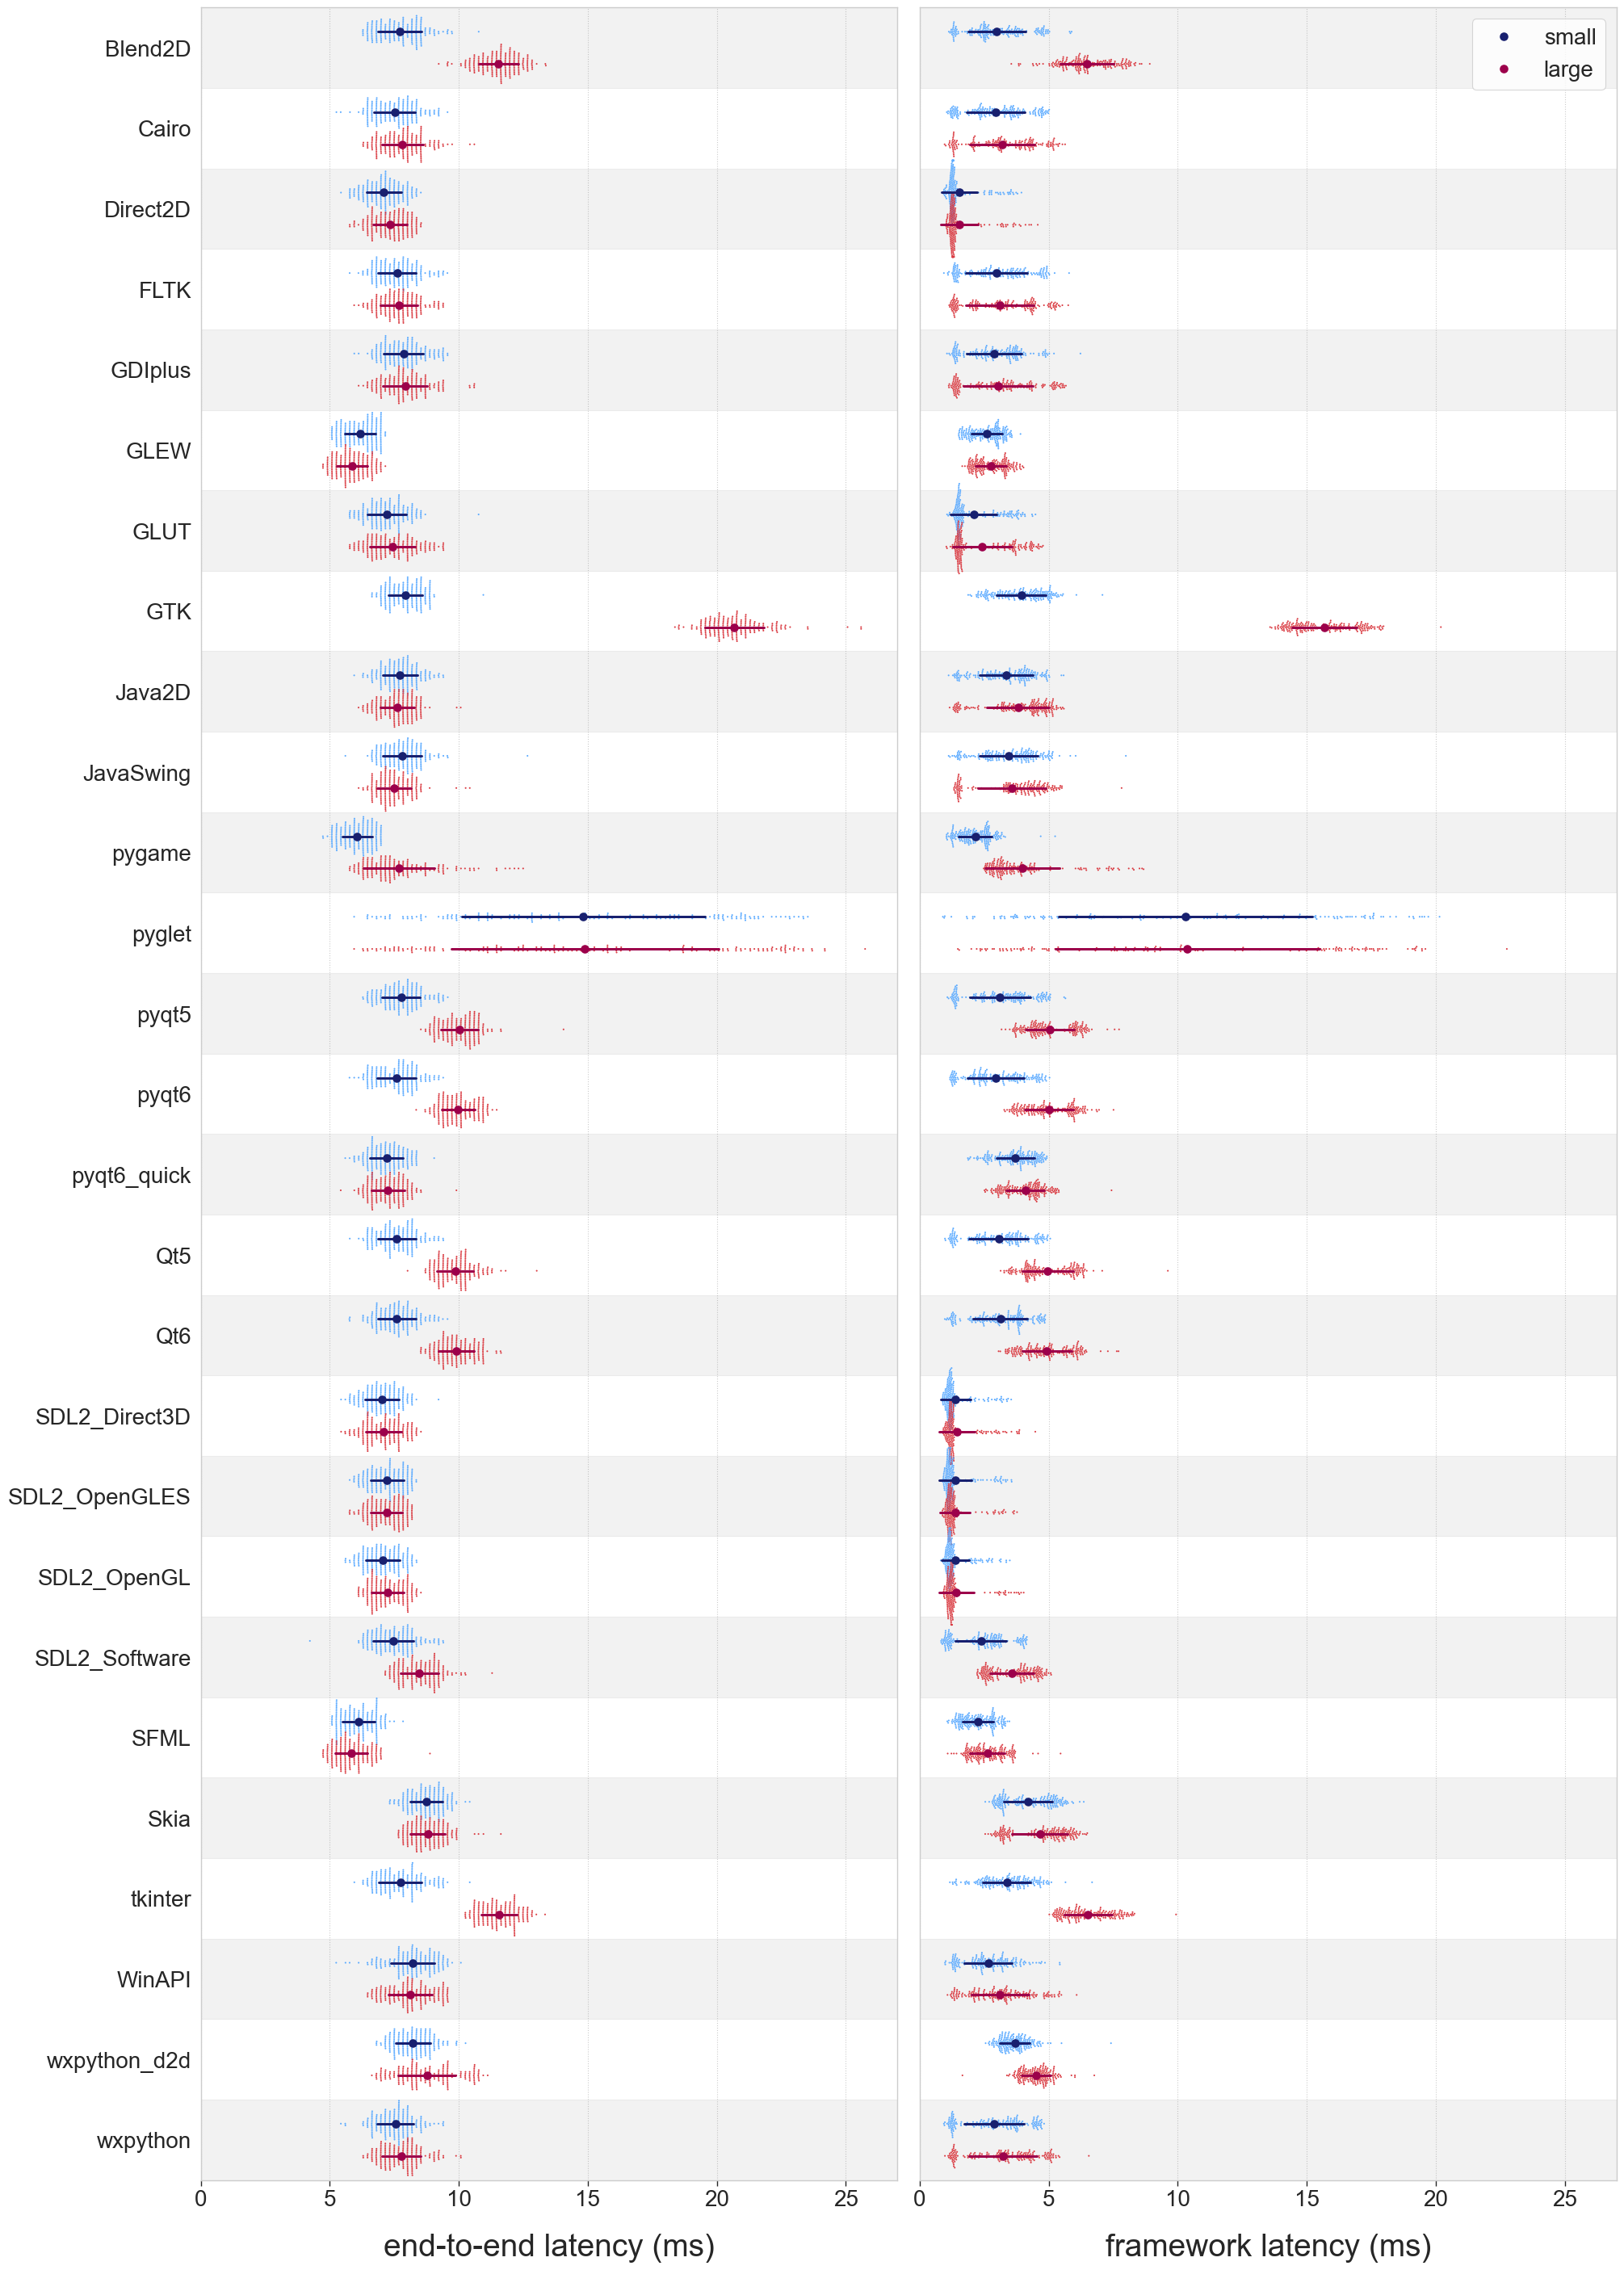

In [176]:
fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))
axs[0].tick_params(axis='both', labelsize=20)
axs[1].tick_params(axis='both', labelsize=20)

# stripped background
for i in range(len(data['framework'].unique())):
    if i % 2 == 0:
        axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
        axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
axs[0].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
axs[1].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

plot = sns.swarmplot(ax=axs[0], data=data[data['program'] == 'getpixel'], x='ete_upper', y='framework', hue='fullscreen', size=1.5, dodge=True, hue_order=['small', 'large'], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[1], data=data[data['program'] == 'getpixel'], x='fw', y='framework', hue='fullscreen', size=1.5, dodge=True, hue_order=['small', 'large'], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.pointplot(ax=axs[0], data=data[data['program'] == 'getpixel'], x='ete_upper', y='framework', hue='fullscreen', hue_order=['small', 'large'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)
plot = sns.pointplot(ax=axs[1], data=data[data['program'] == 'getpixel'], x='fw', y='framework', hue='fullscreen', hue_order=['small', 'large'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# increase label size
axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
axs[1].set_xlabel('framework latency (ms)', fontsize=28)
axs[0].xaxis.labelpad = 20
axs[1].xaxis.labelpad = 20
axs[0].set_ylabel('')

plot.set_xlim(left=0)

plt.legend(title='', fontsize=20, loc='upper right')

plt.savefig("point_swarm_size_getpixel_high.pdf", format='pdf')

C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_8268\2787341016.py:15: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  plot = sns.pointplot(ax=axs[0], data=data[data['program'] == 'windup'], x='ete_upper', y='framework', hue='fullscreen', hue_order=['small', 'large'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)
C:\Users\tinaemmert\AppData\Local\Temp\ipykernel_8268\2787341016.py:16: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  plot = sns.pointplot(ax=axs[1], data=data[data['program'] == 'windup'], x='fw', y='framework', hue='fullscreen', hue_order=['small', 'large'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)


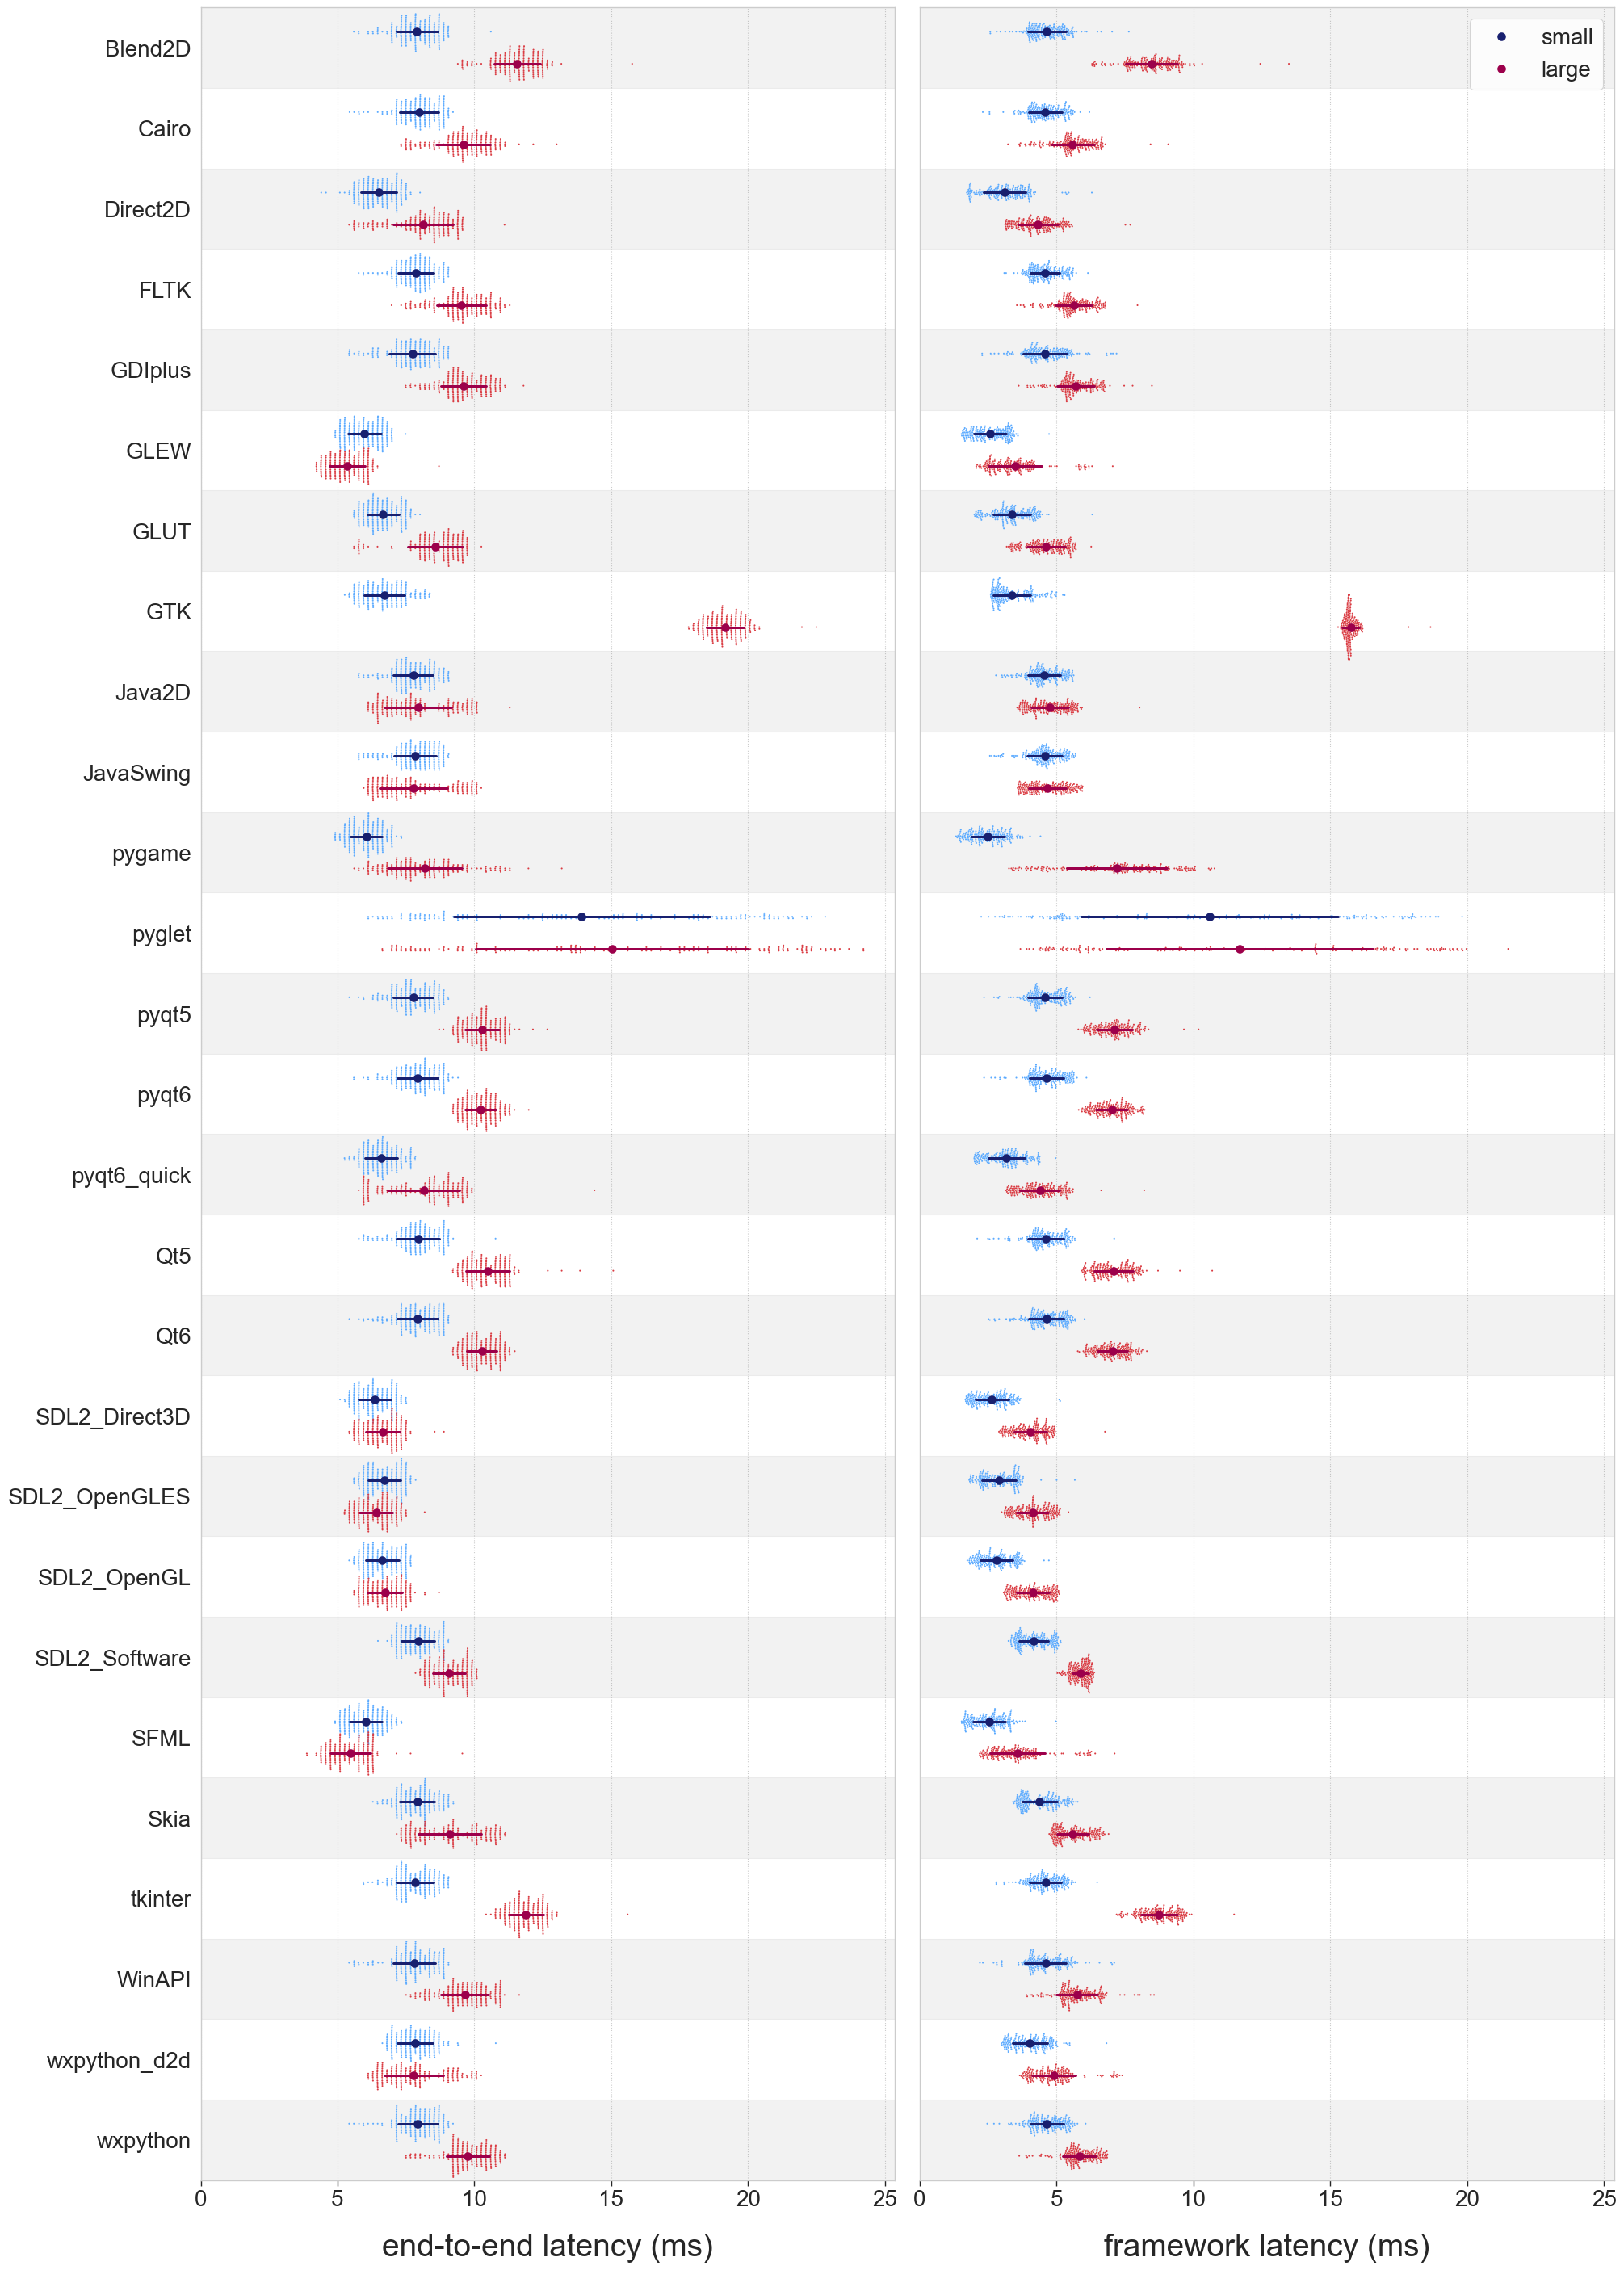

In [175]:
fig, axs = plt.subplots(1, 2, layout='constrained', sharex=True, sharey=True, figsize=(20, 28))
axs[0].tick_params(axis='both', labelsize=20)
axs[1].tick_params(axis='both', labelsize=20)

# stripped background
for i in range(len(data['framework'].unique())):
    if i % 2 == 0:
        axs[0].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
        axs[1].axhspan(i - 0.5, i + 0.5, color='grey', alpha=0.1)
axs[0].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)
axs[1].set_ylim(-0.5, len(data['framework'].unique()) - 0.5)

plot = sns.swarmplot(ax=axs[0], data=data[data['program'] == 'windup'], x='ete_upper', y='framework', hue='fullscreen', size=1.5, dodge=True, hue_order=['small', 'large'], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.swarmplot(ax=axs[1], data=data[data['program'] == 'windup'], x='fw', y='framework', hue='fullscreen', size=1.5, dodge=True, hue_order=['small', 'large'], palette=[COLOR_BLUE, COLOR_GLUTROT], legend=False, zorder=1)
plot = sns.pointplot(ax=axs[0], data=data[data['program'] == 'windup'], x='ete_upper', y='framework', hue='fullscreen', hue_order=['small', 'large'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], legend=False, dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)
plot = sns.pointplot(ax=axs[1], data=data[data['program'] == 'windup'], x='fw', y='framework', hue='fullscreen', hue_order=['small', 'large'], palette=[COLOR_DARKBLUE, COLOR_HEIDENELKE], dodge=0.4, join=False, errorbar='sd', markersize=6, zorder=2)

# increase label size
axs[0].set_xlabel('end-to-end latency (ms)', fontsize=28)
axs[1].set_xlabel('framework latency (ms)', fontsize=28)
axs[0].xaxis.labelpad = 20
axs[1].xaxis.labelpad = 20
axs[0].set_ylabel('')

plot.set_xlim(left=0)

plt.legend(title='', fontsize=20, loc='upper right')

plt.savefig("point_swarm_size_windup_high.pdf", format='pdf')

In [44]:
# getpixel
data_small_getpixel = data_small[data_small['program'] == 'getpixel']
data_large_getpixel = data_large[data_large['program'] == 'getpixel']

data_comparison_getpixel = pd.DataFrame(columns=['median_ete', 'std_ete', 'median_fw', 'std_fw'], index=['small', 'large'])

data_comparison_getpixel.at['small', 'median_ete'] = data_small_getpixel['ete_upper'].median()
data_comparison_getpixel.at['small', 'median_fw'] = data_small_getpixel['fw'].median()
data_comparison_getpixel.at['small', 'std_ete'] = data_small_getpixel['ete_upper'].std()
data_comparison_getpixel.at['small', 'std_fw'] = data_small_getpixel['fw'].std()

data_comparison_getpixel.at['large', 'median_ete'] = data_large_getpixel['ete_upper'].median()
data_comparison_getpixel.at['large', 'median_fw'] = data_large_getpixel['fw'].median()
data_comparison_getpixel.at['large', 'std_ete'] = data_large_getpixel['ete_upper'].std()
data_comparison_getpixel.at['large', 'std_fw'] = data_large_getpixel['fw'].std()

data_comparison_getpixel


,median_ete,std_ete,median_fw,std_fw
small,7.501,1.899797,2.843,2.07558
large,8.023,3.228371,3.84,3.225256


In [45]:
# windup
data_small_windup = data_small[data_small['program'] == 'windup']
data_large_windup = data_large[data_large['program'] == 'windup']

data_comparison_windup = pd.DataFrame(columns=['median_ete', 'std_ete', 'median_fw', 'std_fw'], index=['small', 'large'])

data_comparison_windup.at['small', 'median_ete'] = data_small_windup['ete_upper'].median()
data_comparison_windup.at['small', 'median_fw'] = data_small_windup['fw'].median()
data_comparison_windup.at['small', 'std_ete'] = data_small_windup['ete_upper'].std()
data_comparison_windup.at['small', 'std_fw'] = data_small_windup['fw'].std()

data_comparison_windup.at['large', 'median_ete'] = data_large_windup['ete_upper'].median()
data_comparison_windup.at['large', 'median_fw'] = data_large_windup['fw'].median()
data_comparison_windup.at['large', 'std_ete'] = data_large_windup['ete_upper'].std()
data_comparison_windup.at['large', 'std_fw'] = data_large_windup['fw'].std()

data_comparison_windup

,median_ete,std_ete,median_fw,std_fw
small,7.341,1.820195,4.106,1.859633
large,9.223,3.076272,5.5335,2.858347
